<ipython-input-14-7b7e03a9b6b4>:23: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(neg_c, A_ub=A, b_ub=b, bounds=(0, None), method='simplex')


Lucro máximo: R$2328.55
Área plantada de Alface: 2600.00 m²
Área plantada de Tomate: 1600.00 m²
Área plantada de Tomatinho: 7100.00 m²
Área plantada de Pimentão: 700.00 m²


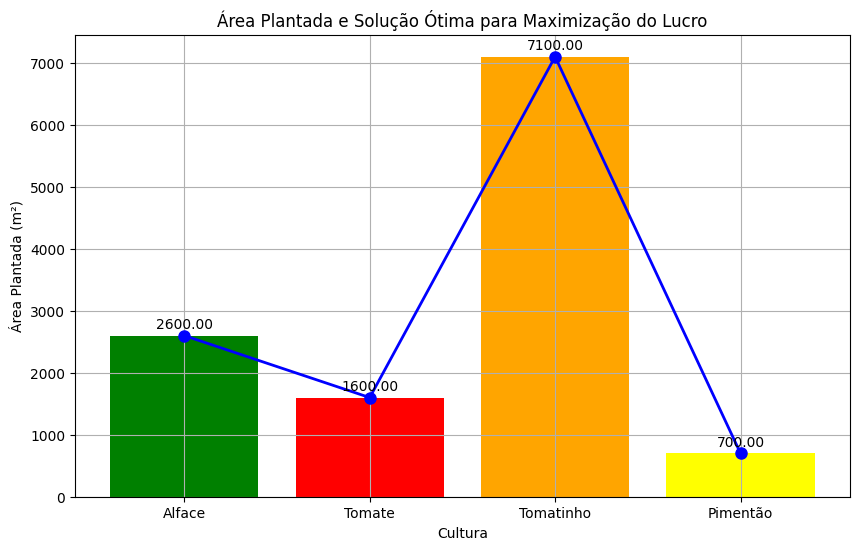

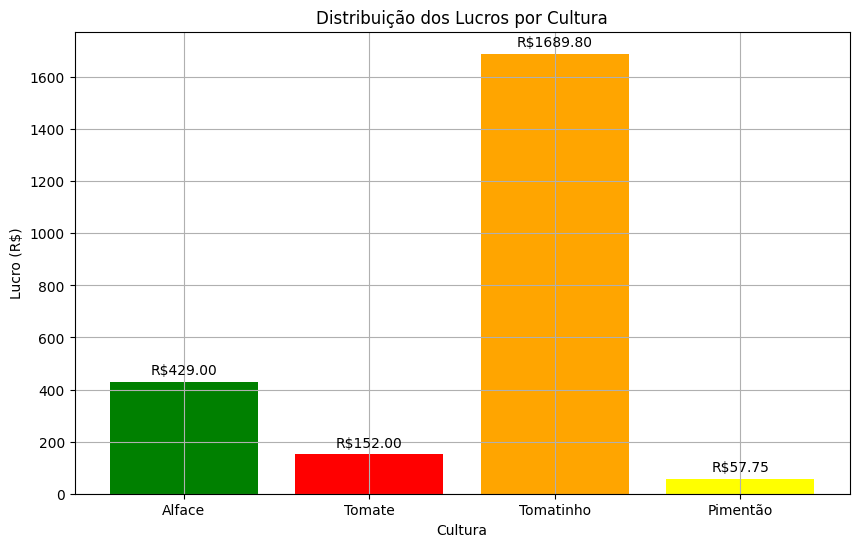

Preços sombra: [   0.    0. 6600.    0.    0. 2785.]
Intervalo de variação dos coeficientes da função objetivo: [(0.165, 0.165), (0.095, 0.095), (-6599.762, 0.238), (0.0825, 0.0825)]
Intervalo de variação dos limites das restrições: [(-5200.0, inf), (-3200.0, inf), (-7600.0, inf), (-1400.0, inf), (-inf, 12700.0), (-inf, 11763.636363636364)]


In [ ]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

# Coeficientes da função objetivo (negativos para maximização)
c = np.array([0.165, 0.095, 0.238, 0.0825])
neg_c = -c

# Matriz das restrições
A = np.array([
    [-1, 0, 0, 0],
    [0, -1, 0, 0],
    [0, 0, -1, 0],
    [0, 0, 0, -1],
    [1, 1, 1, 1],
    [0.15, 0.10, 0.28, 0.11]
])

# Vetor de limites das restrições
b = np.array([-2600, -1600, -500, -700, 12000, 5400])

# Chamando a função linprog para resolver o problema
res = linprog(neg_c, A_ub=A, b_ub=b, bounds=(0, None), method='simplex')

# Obtendo os resultados
max_lucro = -res.fun
areas_plantadas = res.x

# Calculando o lucro por cultura
lucros_culturas = areas_plantadas * c

print(f"Lucro máximo: R${max_lucro:.2f}")
print(f"Área plantada de Alface: {areas_plantadas[0]:.2f} m²")
print(f"Área plantada de Tomate: {areas_plantadas[1]:.2f} m²")
print(f"Área plantada de Tomatinho: {areas_plantadas[2]:.2f} m²")
print(f"Área plantada de Pimentão: {areas_plantadas[3]:.2f} m²")

# Nomes das culturas
culturas = ['Alface', 'Tomate', 'Tomatinho', 'Pimentão']

# Criando o gráfico de barras para área plantada
plt.figure(figsize=(10, 6))
bars_area = plt.bar(culturas, areas_plantadas, color=['green', 'red', 'orange', 'yellow'])

# Adicionando o gráfico de linha para maximização do lucro
plt.plot(culturas, areas_plantadas, color='blue', marker='o', linestyle='-', linewidth=2, markersize=8)

# Adicionando rótulos nas barras de área plantada
for bar in bars_area:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Configurações do gráfico de área plantada
plt.xlabel('Cultura')
plt.ylabel('Área Plantada (m²)')
plt.title('Área Plantada e Solução Ótima para Maximização do Lucro')
plt.grid(True)
plt.show()

# Criando o gráfico de barras para lucro por cultura
plt.figure(figsize=(10, 6))
bars_lucro = plt.bar(culturas, lucros_culturas, color=['green', 'red', 'orange', 'yellow'])

# Adicionando rótulos nas barras de lucro
for bar in bars_lucro:
    height = bar.get_height()
    plt.annotate(f'R${height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Configurações do gráfico de lucro
plt.xlabel('Cultura')
plt.ylabel('Lucro (R$)')
plt.title('Distribuição dos Lucros por Cultura')
plt.grid(True)
plt.show()

# Análise de Sensibilidade
def sensitivity_analysis(res, A, b, c):
    # Verificar se a solução foi obtida
    if res.success:
        # Preços sombra
        shadow_prices = res['slack']
        print("Preços sombra:", shadow_prices)

        # Intervalo de variação para os coeficientes da função objetivo
        num_var = len(c)
        c_range = []
        for i in range(num_var):
            if res['x'][i] > 0:
                delta_c_plus = float('inf')
                delta_c_minus = -float('inf')
                for j in range(len(b)):
                    if A[j, i] != 0:
                        ratio = shadow_prices[j] / A[j, i]
                        if A[j, i] > 0:
                            delta_c_plus = min(delta_c_plus, ratio)
                        elif A[j, i] < 0:
                            delta_c_minus = max(delta_c_minus, ratio)
                c_range.append((c[i] + delta_c_minus, c[i] + delta_c_plus))
            else:
                c_range.append((0, float('inf')))

        print("Intervalo de variação dos coeficientes da função objetivo:", c_range)

        # Intervalo de variação para os limites das restrições
        b_range = []
        for i in range(len(b)):
            delta_b_plus = float('inf')
            delta_b_minus = -float('inf')
            for j in range(len(c)):
                if A[i, j] != 0:
                    ratio = res['x'][j] / A[i, j]
                    if A[i, j] > 0:
                        delta_b_plus = min(delta_b_plus, ratio)
                    elif A[i, j] < 0:
                        delta_b_minus = max(delta_b_minus, ratio)
            b_range.append((b[i] + delta_b_minus, b[i] + delta_b_plus))

        print("Intervalo de variação dos limites das restrições:", b_range)
    else:
        print("A análise de sensibilidade não está disponível diretamente no resultado.")

# Executando a análise de sensibilidade
sensitivity_analysis(res, A, b, c)


R$2.328, 55 e as
variáveis de decisão (área em m 2 a ser plantada de cada produto) apresentam os seguintes
valores: x 1 = 2600 m 2 , x 2 = 1600 m 2 , x 3 = 7100 m 2 e x 4 = 700 m 2 .